# La Liga vs Premier League Analysis
**Sebastian Ospina Valderrama**

## Introduction
The UEFA Champions League represents the pinnacle of club football worldwide. In recent years, this prestigious tournament has been dominated by two prominent leagues: La Liga, which hosts Spanish clubs, and the Premier League, home to English clubs and frequently acclaimed as the best football league in the world. Despite this widespread perception, the question arises: Why has the Spanish League rarely been considered the best league in the world? The hypothesis is that La Liga has been superior to the Premier League in recent years. And what better way to test this hypothesis than by analyzing head-to-head encounters in the UEFA Champions League?

## Data Loading
We have a dataset stored in an Excel file that includes all the matches and information about the participating teams in the UEFA Champions League from 2016 to 2022. However, we need to transform the data to associate each club with its respective country of origin.

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(skimr)

df_matches <- read_excel("/kaggle/input/uefa-champions-league-2016-2022-data/UEFA Champions League 2016-2022 Data.xlsx", sheet= 'matches')
df_teams <- read_excel("/kaggle/input/uefa-champions-league-2016-2022-data/UEFA Champions League 2016-2022 Data.xlsx", sheet= 'teams')


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
glimpse(df_matches)

Rows: 744
Columns: 10
$ MATCH_ID          <chr> "mt1", "mt2", "mt3", "mt4", "mt5", "mt6", "mt7", "mt…
$ SEASON            <chr> "2021-2022", "2021-2022", "2021-2022", "2021-2022", …
$ DATE_TIME         <chr> "15-SEP-21 08.00.00.000000000 PM", "15-SEP-21 08.00.…
$ HOME_TEAM         <chr> "Manchester City", "Club Brugge KV", "Paris Saint-Ge…
$ AWAY_TEAM         <chr> "RB Leipzig", "Paris Saint-Germain", "Manchester Cit…
$ STADIUM           <chr> "Etihad Stadium", "Jan Breydel Stadion", "Parc des P…
$ HOME_TEAM_SCORE   <dbl> 6, 1, 2, 1, 1, 3, 2, 4, 2, 0, 2, 4, 0, 3, 1, 1, 2, 1…
$ AWAY_TEAM_SCORE   <dbl> 3, 1, 0, 2, 5, 2, 2, 1, 1, 5, 1, 1, 0, 2, 5, 2, 3, 0…
$ PENALTY_SHOOT_OUT <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ATTENDANCE        <dbl> 38062, 27546, 37350, 23500, 24915, 47359, 39794, 502…


In [3]:
glimpse(df_teams)

Rows: 74
Columns: 3
$ TEAM_NAME    <chr> "AC Milan", "AFC Ajax", "Atalanta", "Atlético Madrid", "B…
$ COUNTRY      <chr> "Italy", "Netherlands", "Italy", "Spain", "Germany", "Tur…
$ HOME_STADIUM <chr> "Giuseppe Meazza", "Johan Cruijff ArenA", "Gewiss Stadium…


## Data Transformation
In the Champions League dataset, we identify several key variables that provide detailed information about each match. These variables include the tournament year (SEASON), home teams (HOME_TEAM) and away teams (AWAY_TEAM), home team scores (HOME_TEAM_SCORE) and away team scores (AWAY_TEAM_SCORE), and stadium attendance (ATTENDANCE). Additionally, we created a new variable called ‘MATCH_RESULT’ to capture the outcome of each match based on the team scores.

In [4]:
df_matches <- df_matches %>%
  select(SEASON, HOME_TEAM, AWAY_TEAM, HOME_TEAM_SCORE, AWAY_TEAM_SCORE, ATTENDANCE) %>%
  mutate(MATCH_RESULT = case_when(
    HOME_TEAM_SCORE > AWAY_TEAM_SCORE ~ 'HW',
    HOME_TEAM_SCORE < AWAY_TEAM_SCORE ~ 'AW',
    TRUE ~ 'TT'
  ))

# Merge dataframes to get the countries of origin
df_complete <- df_matches %>%
  left_join(df_teams, by = c('HOME_TEAM' = 'TEAM_NAME')) %>%
  rename(HOME_COUNTRY = COUNTRY) %>%
  left_join(df_teams, by = c('AWAY_TEAM' = 'TEAM_NAME')) %>%
  rename(AWAY_COUNTRY = COUNTRY)

# Adjust the format of the dataframe
df_ucl <- df_complete %>%
  select(-c(HOME_STADIUM.x, HOME_STADIUM.y)) %>%
  mutate(across(all_of(c(1:3, 7:9)), as.factor)) %>%
  mutate(across(all_of(c(4:6)), as.integer))
head(df_ucl)

SEASON,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,ATTENDANCE,MATCH_RESULT,HOME_COUNTRY,AWAY_COUNTRY
<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2021-2022,Manchester City,RB Leipzig,6,3,38062,HW,England,Germany
2021-2022,Club Brugge KV,Paris Saint-Germain,1,1,27546,TT,Belgium,France
2021-2022,Paris Saint-Germain,Manchester City,2,0,37350,HW,France,England
2021-2022,RB Leipzig,Club Brugge KV,1,2,23500,AW,Germany,Belgium
2021-2022,Club Brugge KV,Manchester City,1,5,24915,AW,Belgium,England
2021-2022,Paris Saint-Germain,RB Leipzig,3,2,47359,HW,France,Germany


In [5]:
glimpse(df_ucl)

Rows: 744
Columns: 9
$ SEASON          <fct> 2021-2022, 2021-2022, 2021-2022, 2021-2022, 2021-2022,…
$ HOME_TEAM       <fct> Manchester City, Club Brugge KV, Paris Saint-Germain, …
$ AWAY_TEAM       <fct> RB Leipzig, Paris Saint-Germain, Manchester City, Club…
$ HOME_TEAM_SCORE <int> 6, 1, 2, 1, 1, 3, 2, 4, 2, 0, 2, 4, 0, 3, 1, 1, 2, 1, …
$ AWAY_TEAM_SCORE <int> 3, 1, 0, 2, 5, 2, 2, 1, 1, 5, 1, 1, 0, 2, 5, 2, 3, 0, …
$ ATTENDANCE      <int> 38062, 27546, 37350, 23500, 24915, 47359, 39794, 50228…
$ MATCH_RESULT    <fct> HW, TT, HW, AW, AW, HW, TT, HW, HW, AW, HW, HW, TT, HW…
$ HOME_COUNTRY    <fct> England, Belgium, France, Germany, Belgium, France, Ge…
$ AWAY_COUNTRY    <fct> Germany, France, England, Belgium, England, Germany, F…


## Filter Matches
Now, we filter the matches of our interest, specifically those where teams from Spain faced teams from England in the UEFA Champions League.

In [6]:
df_ucl_esen <- df_ucl %>%
  filter(HOME_COUNTRY == 'England' & AWAY_COUNTRY == 'Spain' |
         HOME_COUNTRY == 'Spain' & AWAY_COUNTRY == 'England')
head(df_ucl_esen)

SEASON,HOME_TEAM,AWAY_TEAM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,ATTENDANCE,MATCH_RESULT,HOME_COUNTRY,AWAY_COUNTRY
<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2021-2022,Atlético Madrid,Liverpool FC,2,3,60725,AW,Spain,England
2021-2022,Liverpool FC,Atlético Madrid,2,0,51347,HW,England,Spain
2021-2022,Manchester United,Villarreal CF,2,1,73130,HW,England,Spain
2021-2022,Villarreal CF,Manchester United,0,2,20875,AW,Spain,England
2021-2022,Atlético Madrid,Manchester United,1,1,63273,TT,Spain,England
2021-2022,Manchester United,Atlético Madrid,0,1,73008,AW,England,Spain


In [7]:
glimpse(df_ucl_esen)

Rows: 54
Columns: 9
$ SEASON          <fct> 2021-2022, 2021-2022, 2021-2022, 2021-2022, 2021-2022,…
$ HOME_TEAM       <fct> Atlético Madrid, Liverpool FC, Manchester United, Vill…
$ AWAY_TEAM       <fct> Liverpool FC, Atlético Madrid, Villarreal CF, Manchest…
$ HOME_TEAM_SCORE <int> 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 4, 2, 2, 3, 0, 0, 0, 0, …
$ AWAY_TEAM_SCORE <int> 3, 0, 1, 2, 1, 1, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0, 4, 1, …
$ ATTENDANCE      <int> 60725, 51347, 73130, 20875, 63273, 73008, 52018, 38689…
$ MATCH_RESULT    <fct> AW, HW, HW, AW, TT, AW, HW, AW, AW, TT, HW, HW, AW, HW…
$ HOME_COUNTRY    <fct> Spain, England, England, Spain, Spain, England, Englan…
$ AWAY_COUNTRY    <fct> England, Spain, Spain, England, England, Spain, Spain,…


## Frequency Analysis
In this section, we will analyze the frequency of matches between teams from Spain and teams from England in the UEFA Champions League, broken down by season.

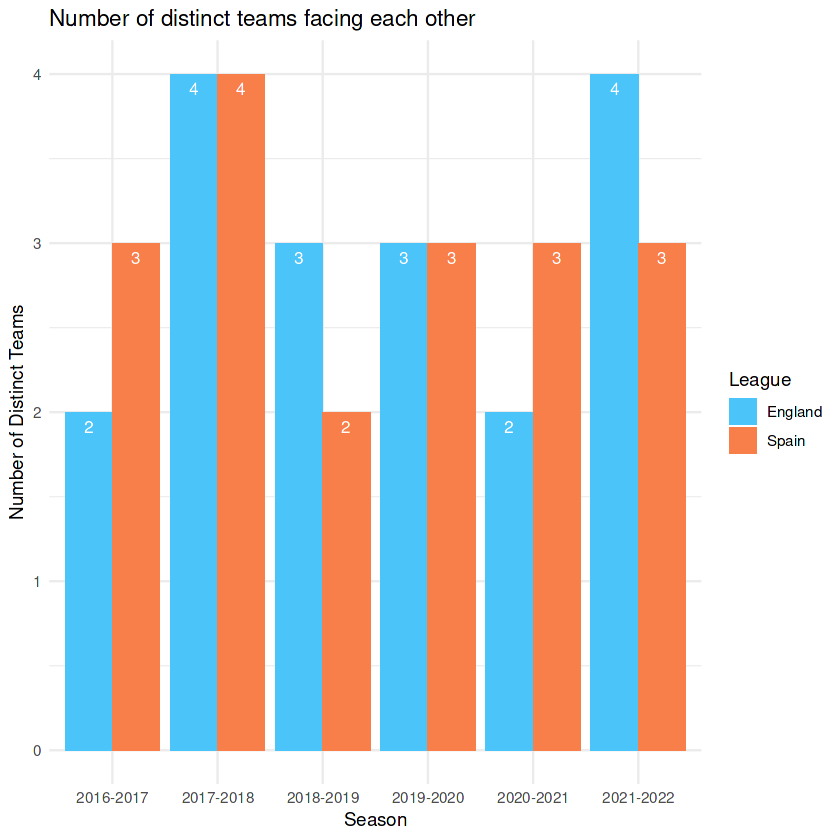

In [8]:
g1 <- df_ucl_esen %>%
  group_by(SEASON, HOME_COUNTRY) %>%
  summarise(TEAMS_COUNT = length(unique(HOME_TEAM, AWAY_TEAM)), .groups = 'drop') %>%
  ungroup() %>%
  ggplot(aes(x = SEASON, y = TEAMS_COUNT, fill = HOME_COUNTRY)) +
  geom_bar(stat = 'identity', position = position_dodge()) +
  theme_minimal() + xlab('Season') + ylab('Number of Distinct Teams') +
  geom_text(aes(label= TEAMS_COUNT), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5) +
  ggtitle('Number of distinct teams facing each other') +
  guides(fill = guide_legend(title = 'League')) +
  scale_fill_manual(values = c('Spain' = '#F97F4A', 'England' = '#4AC4F9'))
g1

In this graph, the distribution of matches between Spanish and English teams in the UEFA Champions League, broken down by season, is presented. This analysis allows us to visualize how many teams from each country played against teams from the other country in each season of the tournament.
The variation in the number of teams facing each other can provide information about the dynamics of the tournaments in each season. For example, a smaller number of teams from one country facing teams from the other country may indicate that the teams from that country went further in the tournament, as they had the opportunity to face a greater variety of teams from the other league. On the other hand, a greater number of matchups may suggest greater variability in the teams reaching the later stages of the tournament.
It is important to highlight that, in general, there is a balance in the matchups between teams from both leagues throughout the seasons. This suggests that the UEFA Champions League is a highly competitive tournament and that both the Spanish League and the Premier League have teams capable of going far in the competition.

## Home Wins Analysis
In this section, we present the home wins of each team by season against teams from the other league. This representation allows us to analyze how the performance of home teams from each league has varied over the seasons.

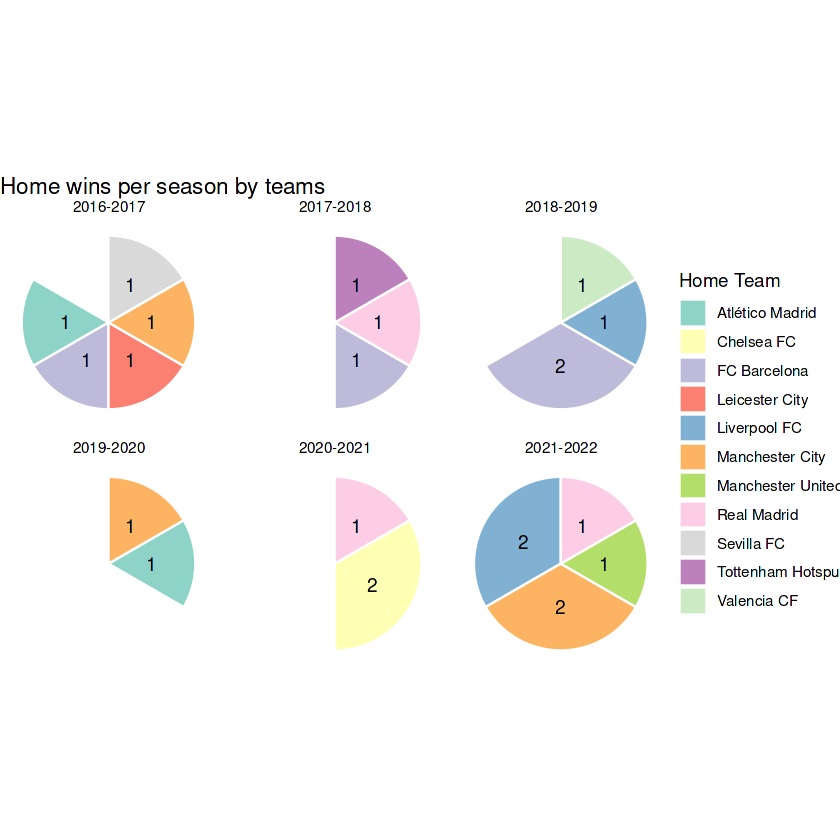

In [9]:
home_wins <- df_ucl_esen %>%
  filter(MATCH_RESULT == 'HW') %>%
  group_by(SEASON, HOME_TEAM) %>%
  summarise(WINS = n(), .groups = 'drop') %>%
  ungroup() %>%
  replace(is.na(.), 0)

g2 <- ggplot(home_wins, aes(x= '', y = WINS, fill = HOME_TEAM)) +
  geom_bar(stat = 'identity', width = 1, color = 'white') +
  coord_polar('y', start = 0) +
  theme_void() +
  geom_text(aes(label= WINS), position = position_stack (vjust = 0.5), color = 'black') +
  facet_wrap(~ SEASON, ncol = 3) +
  scale_fill_brewer(palette = 'Set3') +
  labs(fill = 'Home Team', title = 'Home wins per season by teams')
g2

In this graph, the away victories of each team by season against teams from the other league are presented. This representation allows us to analyze how the performance of visiting teams from each league has varied over the seasons.
By observing the data, we can identify interesting trends. For example, during the period from 2016 to 2019, Barcelona stood out as the Spanish team with the most away victories against Premier League teams. However, from 2020 onwards, Manchester City emerged as the team with the best performance in this metric, surpassing Barcelona.
Additionally, it is notable that in the years 2019 and 2020, there is a significant proportion of draws in the matches between teams from both leagues. This distribution of draws is reflected in the pie chart, where we can see a considerable portion of it dedicated to the draws, corresponding to the empty spaces.

## Away Wins Analysis
In this section, we show the away wins of each team by season against teams from the other league. It is important to note that the number of teams can vary from season to season due to the presence of matches with draws.

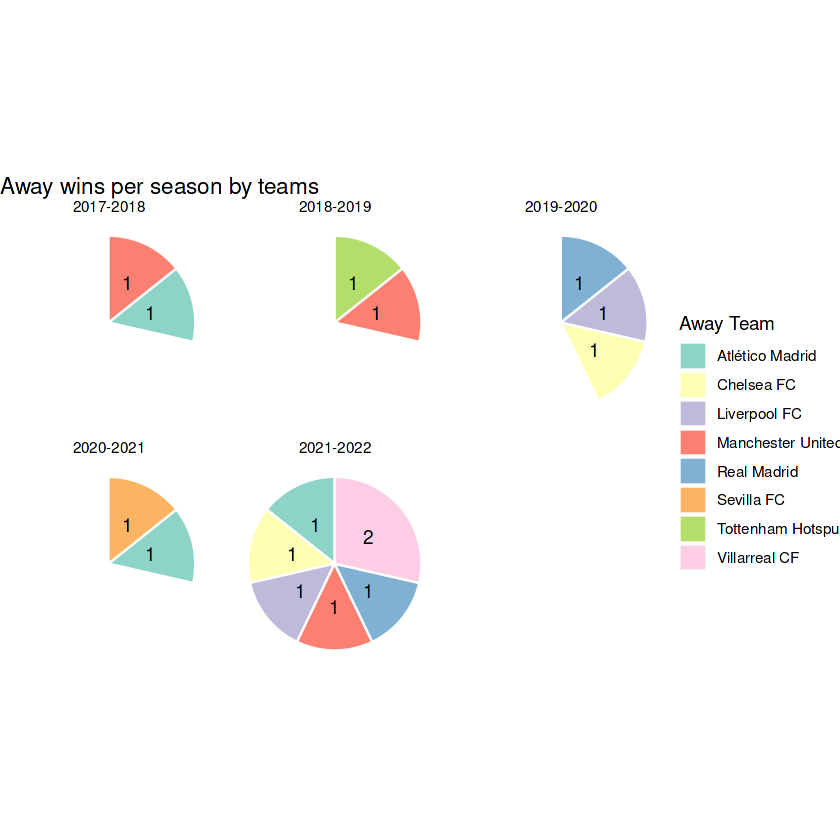

In [10]:
# Away wins analysis
away_wins <- df_ucl_esen %>%
  filter(MATCH_RESULT == 'AW') %>%
  group_by(SEASON, HOME_TEAM) %>%
  summarise(WINS = n(), .groups = 'drop') %>%
  ungroup() %>%
  replace(is.na(.), 0)

g3 <- ggplot(away_wins, aes(x= '', y = WINS, fill = HOME_TEAM)) +
  geom_bar(stat = 'identity', width = 1, color = 'white') +
  coord_polar('y', start = 0) +
  theme_void() +
  geom_text(aes(label= WINS), position = position_stack (vjust = 0.5), color = 'black') +
  facet_wrap(~ SEASON, ncol = 3) +
  scale_fill_brewer(palette = 'Set3') +
  labs(fill = 'Away Team', title = 'Away wins per season by teams')
g3

In this graph, the away victories of each team by season against teams from the other league are shown. It is important to note that the number of teams can vary from season to season due to the presence of matches with draws. For example, in the 2016-2017 season, no away victories are recorded because all matches between Spanish and English teams ended in draws or home victories.
Additionally, a higher proportion of draws is observed in away matches compared to home matches. This suggests that visiting teams may face more difficulties in securing victories in matches away from their home country.

## Points Table
In this section, we create a points table to determine which country would have more points if the Spanish and Premier leagues had faced each other in a league format. In this format, 3 points are awarded for a win, 0 for a loss, and 1 for a draw. Penalty shoot-out wins are not considered as they do not occur in league formats.

In [11]:
points <- df_ucl_esen %>%
  mutate(HOME_POINTS = case_when(
    MATCH_RESULT == 'HW' ~ 3,
    MATCH_RESULT == 'TT' ~ 1,
    TRUE ~ 0
  ), 
  AWAY_POINTS = case_when(
    MATCH_RESULT == 'AW' ~ 3,
    MATCH_RESULT == 'TT' ~ 1,
    TRUE ~ 0
  ))

points_table <- points %>%
  group_by(TEAM = HOME_TEAM) %>%
  summarise(POINTS = sum(HOME_POINTS)) %>%
  bind_rows(points %>%
              group_by(TEAM = AWAY_TEAM) %>%
              summarise(POINTS = sum(AWAY_POINTS))) %>%
  group_by(TEAM) %>%
  summarise(TOTAL_POINTS = sum(POINTS)) %>%
  arrange(desc(TOTAL_POINTS))

points_table

TEAM,TOTAL_POINTS
<fct>,<dbl>
Chelsea FC,23
FC Barcelona,20
Liverpool FC,18
Real Madrid,18
Atlético Madrid,16
Manchester City,16
Sevilla FC,10
Manchester United,9
Valencia CF,8


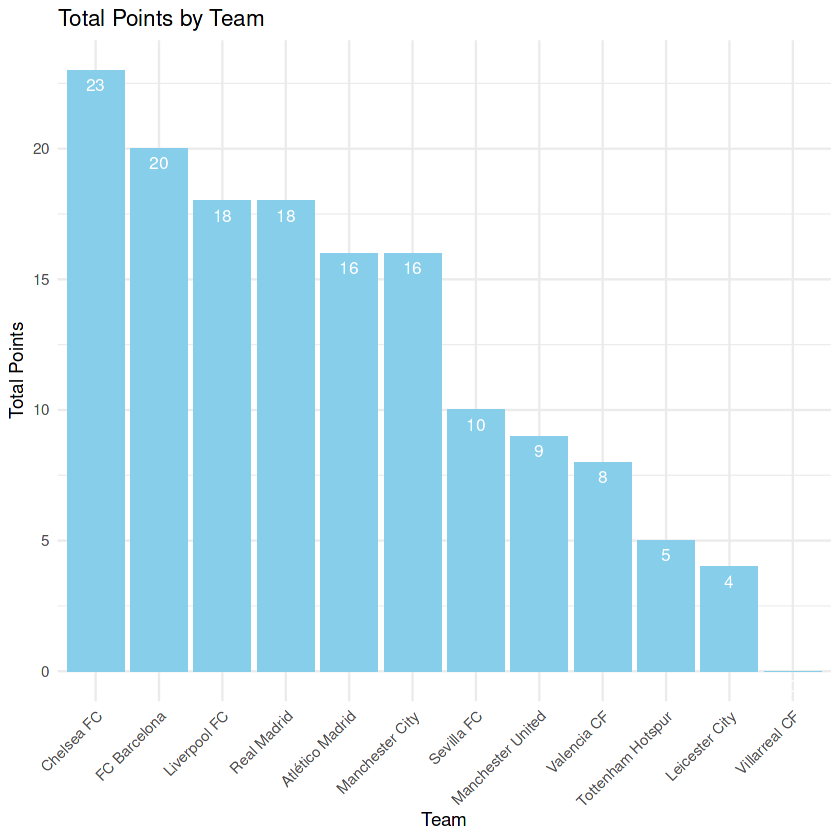

In [12]:
g5 <- ggplot(points_table, aes(x = reorder(TEAM, -TOTAL_POINTS), y = TOTAL_POINTS)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label= TOTAL_POINTS), vjust=1.6, color="white",
            position = position_dodge(0.9), size=3.5) +
  labs(x = "Team", y = "Total Points", title = "Total Points by Team") +  
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
g5

In the generated points table, it is observed that the team with the most points is Chelsea, with a total of 23 points. They are followed by Barcelona with 20 points, and in a tie for third place are Real Madrid and Liverpool.
It is notable that Villarreal did not achieve a single victory or draw against Premier League teams in the analyzed matchups.

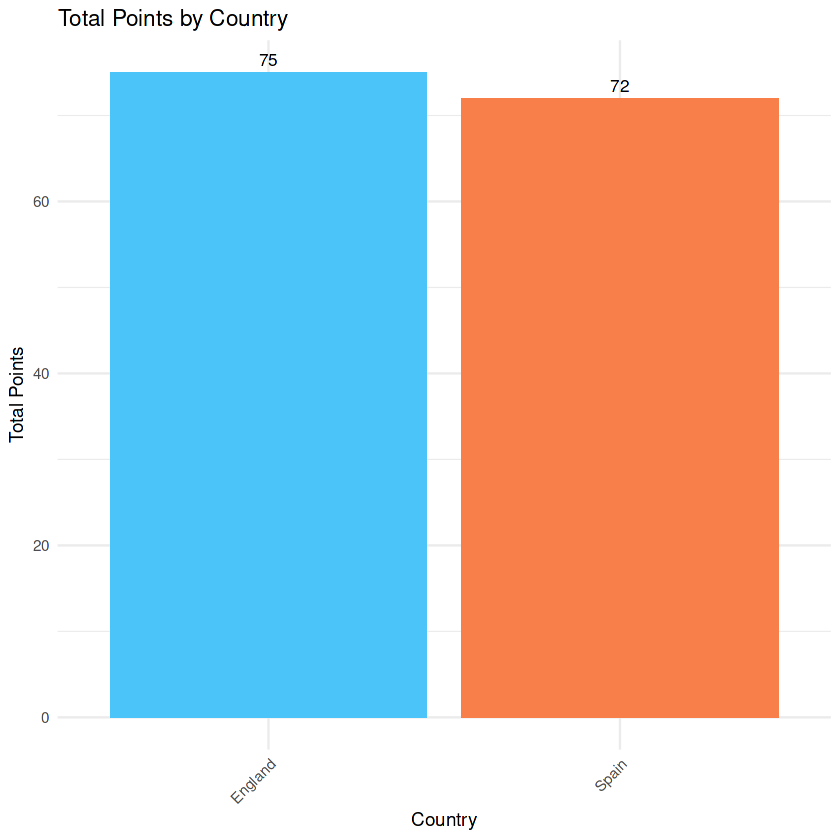

In [13]:
points_table_p <- inner_join(points_table, df_teams, by = c('TEAM'='TEAM_NAME'))
points_table_p$COUNTRY <- factor(points_table_p$COUNTRY, levels = c('Spain', 'England'))

total_points_by_country <- points_table_p %>%
  group_by(COUNTRY) %>%
  summarise(TOTAL_POINTS = sum(TOTAL_POINTS))

g6 <- ggplot(points_table_p, aes(x = reorder(COUNTRY, -TOTAL_POINTS), y = TOTAL_POINTS, fill = COUNTRY)) + 
  geom_bar(stat = 'identity') +
  labs(x = "Country", y = "Total Points", title = "Total Points by Country") + theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c('Spain' = '#F97F4A', 'England' = '#4AC4F9'), guide = 'none') +
  scale_x_discrete(labels = c('Spain' = 'Spain', 'England' = 'England')) + 
  geom_text(data = total_points_by_country, aes(label = TOTAL_POINTS, y = TOTAL_POINTS), 
            vjust = -0.5, color = "black", size = 3.5, position = position_dodge(width = 0.9))
g6

When combining points by country, it is observed that England obtained the highest number of points, surpassing Spain by 3 points in a total of 54 matches. However, it is important to consider that this difference might not be statistically significant due to the limited sample size.
Given the competitive and varied nature of the UEFA Champions League, results can vary significantly from one season to another and may be subject to a wide range of factors, including the individual skills of the teams, game strategies, injuries, and other aspects of performance.
Therefore, even though England obtained more points in this specific sample of matches, it is necessary to interpret these results with caution and recognize that they may not necessarily reflect a general superiority of one country over the other in the broader context of the tournament.

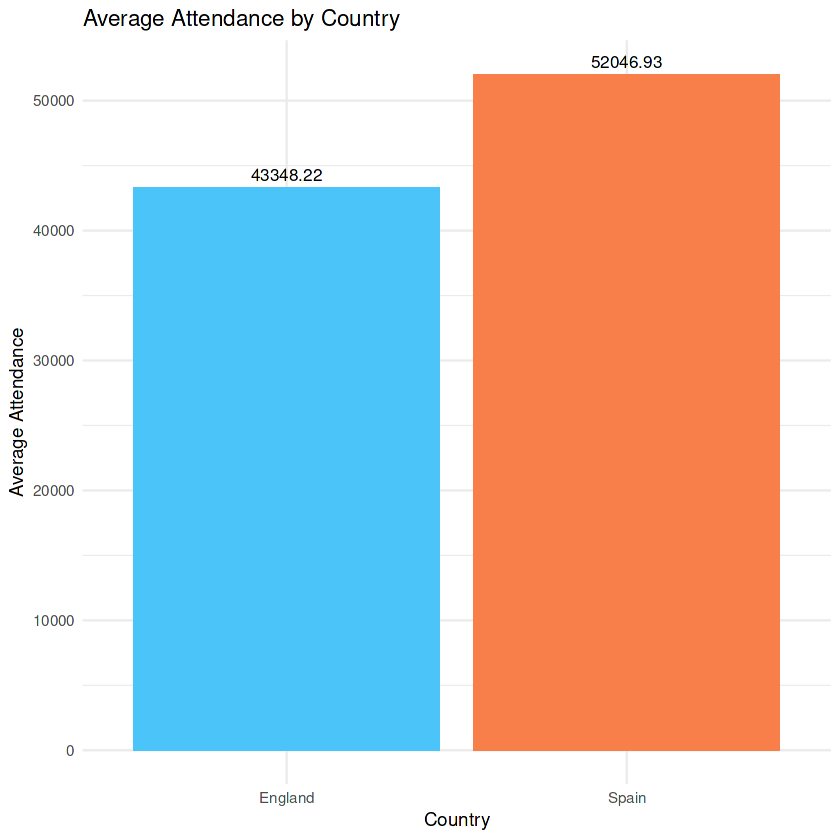

In [14]:
attendance <- df_ucl_esen %>%
  group_by(HOME_COUNTRY) %>%
  summarise('AVERAGE_ATTENDANCE' = mean(ATTENDANCE))

g7 <- ggplot(attendance, aes(x = HOME_COUNTRY, y = AVERAGE_ATTENDANCE, fill = HOME_COUNTRY)) + 
  geom_bar(stat = 'identity') +
  labs(x = "Country", y = "Average Attendance", title = "Average Attendance by Country") + theme_minimal() +
  scale_fill_manual(values = c('Spain' = '#F97F4A', 'England' = '#4AC4F9'), guide = 'none') +
  scale_x_discrete(labels = c('Spain' = 'Spain', 'England' = 'England')) +
  geom_text(aes(label = round(AVERAGE_ATTENDANCE, 2)), vjust = -0.5, color = "black", size = 3.5, position = position_dodge(width = 0.9))
g7

Finally, when comparing the average number of fans per match in the two countries, it is observed that Spain exceeds 50,000 fans per home match, while in England this average is around 43,000 fans per home match.
These differences may be influenced by a variety of factors, such as stadium capacity or when the stadiums were reopened.

## Conclusion
It is observed that the largest teams in each league accumulate the most points in the matchups between the Spanish League and the Premier League in the UEFA Champions League.
Additionally, it is notable that Spanish fans show strong support for their home teams, with an average attendance exceeding 50,000 fans per home match, while in England this average is around 43,000 fans per home match.
Although it is observed that England accumulated more points (75) compared to Spain (72) in the matchups between Spanish League and Premier League teams in the UEFA Champions League, a very close competition between these two leagues is evident.
We cannot categorically state if there is a clear winner between both leagues, but the Spanish League should be considered a good contender for the Premier League.
Based on the findings of this analysis, we can conclude that these leagues are quite evenly matched, at least in terms of their top teams, i.e., those participating in the UEFA Champions League, representing the elite of each league.